In [13]:
# Data Cleaning
import pandas as pd
import numpy as np
import missingno
from collections import Counter

# Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("data.csv")

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print(data.shape)

(891, 12)


In [6]:
# Non-null count and data types of the training and test set

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# Missing data in training set by columns

data.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

<AxesSubplot:>

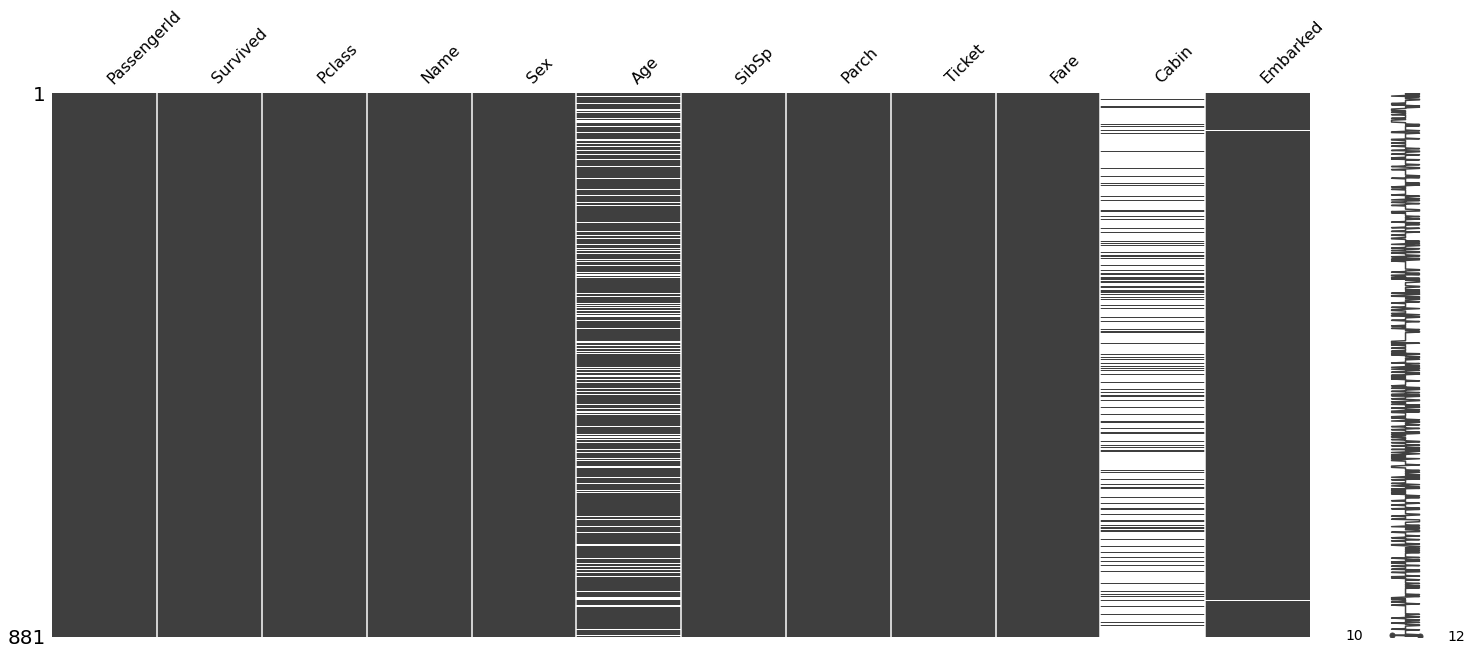

In [52]:
# Missing data in Data set

missingno.matrix(data)

In [11]:
# Summary statistics for training set

data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Percent missing data by feature')

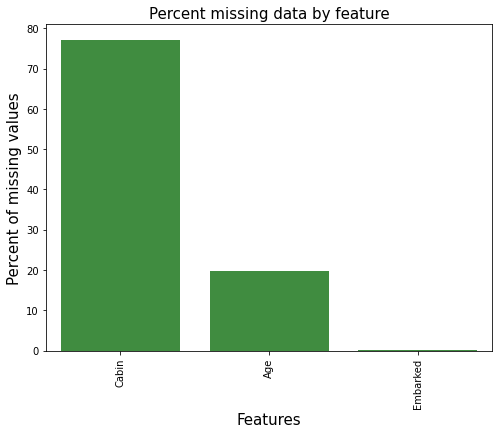

In [14]:
#Missing Data
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
ms= ms[ms["Percent"] > 0]
f,ax =plt.subplots(figsize=(8,6))
plt.xticks(rotation='90')
fig=sns.barplot(ms.index, ms["Percent"],color="green",alpha=0.8)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)


In [17]:
# Value counts of the sex column

data['Sex'].value_counts(dropna = False)

# Comment: There are more male passengers than female passengers on titanic

male      577
female    314
Name: Sex, dtype: int64

In [19]:
# Mean of survival by sex

data[['Sex', 'Survived']].groupby('Sex', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Text(0.5, 1.0, 'Survival Probability by Gender')

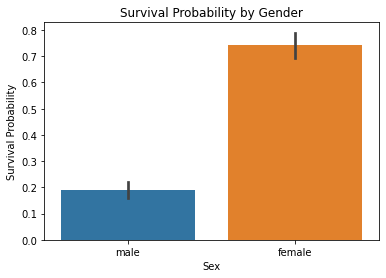

In [20]:
sns.barplot(x = 'Sex', y ='Survived', data = data)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Gender')

# Comment: Female passengers are more likely to survive

In [22]:
# Value counts of the Pclass column 

data['Pclass'].value_counts(dropna = False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [24]:
# Mean of survival by passenger class

data[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Text(0.5, 1.0, 'Survival Probability by Passenger Class')

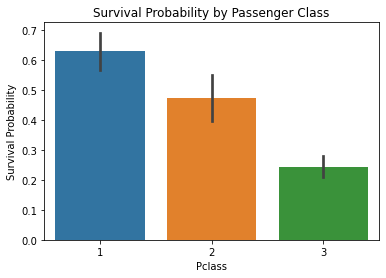

In [25]:
sns.barplot(x = 'Pclass', y ='Survived', data = data)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Passenger Class')

# Comment: Survival probability decrease with passenger class, first class passengers are prioritised during evacuation

Text(0.5, 1.0, 'Survival Probability by Sex and Passenger Class')

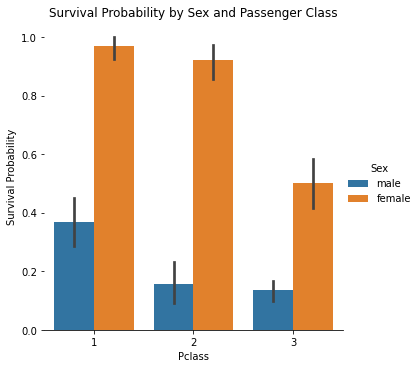

In [26]:
# Survival by gender and passenger class

g = sns.factorplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = data, kind = 'bar')
g.despine(left = True)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Sex and Passenger Class')

In [28]:
# Value counts of the Embarked column 

data['Embarked'].value_counts(dropna = False)

# Comment: Two missing values in the Embarked column

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [29]:
# Mean of survival by point of embarkation

data[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Text(0.5, 1.0, 'Survival Probability by Point of Embarkation')

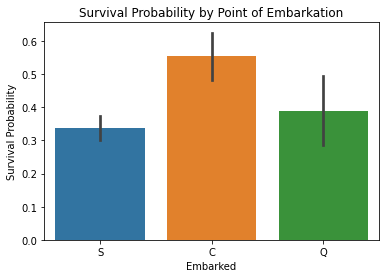

In [30]:
sns.barplot(x = 'Embarked', y ='Survived', data = data)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Point of Embarkation')

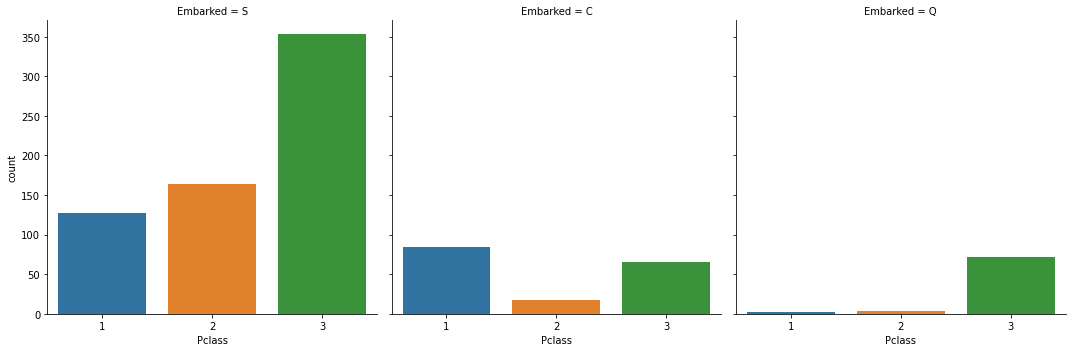

In [31]:
sns.factorplot('Pclass', col = 'Embarked', data = data, kind = 'count')

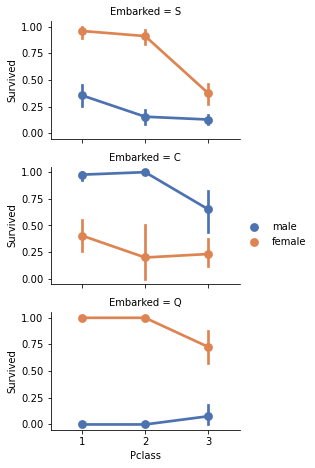

In [32]:
# Survival probability by all categorical variables

grid = sns.FacetGrid(data, row = 'Embarked', size = 2.2, aspect = 1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette = 'deep')
grid.add_legend()

In [33]:
#To drop outliers and print the number of indices and the value.

def detect_outliers(df, n, features):
    outlier_indices = [] 
    for col in features: 
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

outliers_to_drop = detect_outliers(data, 2, ['Age', 'SibSp', 'Parch', 'Fare'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

We will drop these 10 indices:  [27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


In [34]:
# Outliers which need to be removed

data.loc[outliers_to_drop, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [35]:
# Drop outliers and reset index

print("Before: {} rows".format(len(data)))
data = data.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("After: {} rows".format(len(data)))

Before: 891 rows
After: 881 rows


<AxesSubplot:>

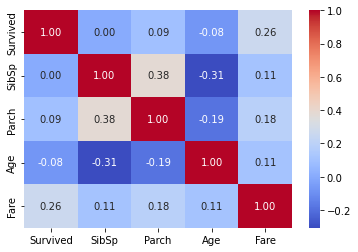

In [37]:
sns.heatmap(data[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')

# Comment: Fare seems to be the only feature that has a substantial correlation with survival

In [38]:
# Value counts of the SibSp column 

data['SibSp'].value_counts(dropna = False)

0    608
1    209
2     28
4     18
3     13
5      5
Name: SibSp, dtype: int64

In [39]:
# Mean of survival by SibSp

data[['SibSp', 'Survived']].groupby('SibSp', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
4,4,0.166667
3,3,0.153846
5,5,0.000000


Text(0.5, 1.0, 'Survival Probability by SibSp')

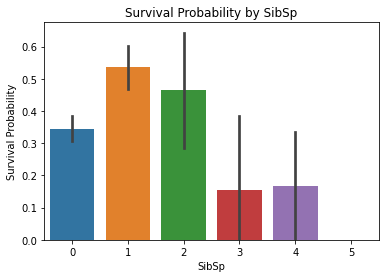

In [40]:
sns.barplot(x = 'SibSp', y ='Survived', data = data)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by SibSp')

In [42]:
# Value counts of the Parch column 

data['Parch'].value_counts(dropna = False)

0    678
1    118
2     70
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [43]:
# Mean of survival by Parch

data[['Parch', 'Survived']].groupby('Parch', as_index = False).mean().sort_values(by = 'Survived', ascending = False)


,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.542857
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Text(0.5, 1.0, 'Survival Probability by Parch')

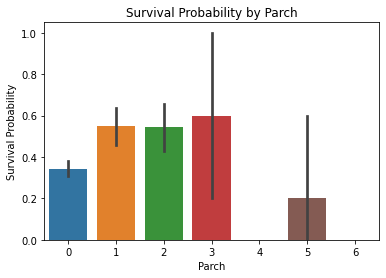

In [44]:
sns.barplot(x = 'Parch', y ='Survived', data = data)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Parch')

In [45]:
# Null values in Age column 

data['Age'].isnull().sum()

170

Text(0.5, 1.0, 'Passenger Age Distribution')

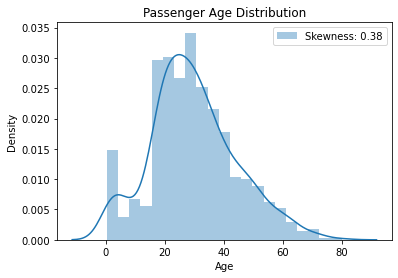

In [47]:
# Passenger age distribution

sns.distplot(data['Age'], label = 'Skewness: %.2f'%(data['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Age Distribution')

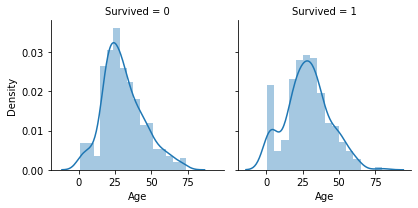

In [48]:
# Age distribution by survival

g = sns.FacetGrid(data, col = 'Survived')
g.map(sns.distplot, 'Age')

Text(0.5, 1.0, 'Passenger Age Distribution by Survival')

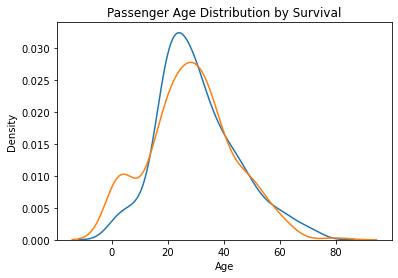

In [49]:
sns.kdeplot(data['Age'][data['Survived'] == 0], label = 'Did not survive')
sns.kdeplot(data['Age'][data['Survived'] == 1], label = 'Survived')
plt.xlabel('Age')
plt.title('Passenger Age Distribution by Survival')

In [50]:
# Null values of Fare column 

data['Fare'].isnull().sum()

0

Text(0, 0.5, 'Passenger Fare Distribution')

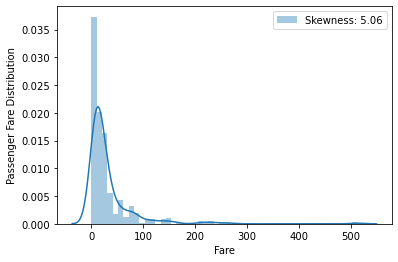

In [51]:
# Passenger fare distribution

sns.distplot(data['Fare'], label = 'Skewness: %.2f'%(data['Fare'].skew()))
plt.legend(loc = 'best')
plt.ylabel('Passenger Fare Distribution')